In [111]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Tabulate and plot APF values

In [112]:
import pandas as pd
import glob
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms

plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'arial'


In [113]:
files = [Path(f) for f in sorted(glob.glob('../data/processed/peak_shapes/ht_area_tables/*.csv'))]

names = [f.stem for f in files]
apf_tables = [pd.read_csv(f, index_col=0) for f in files]
apf_tables = [df.set_index('Sample') for df in apf_tables]

print(names)


for df in apf_tables:
    df['ht_area_ratio_cf_GaN'] = df['ht_area_ratio'] / df.loc['GaN', 'ht_area_ratio']
    df['ht_area_ratio_cf_GaN_stdev'] = df['ht_area_ratio_mc_stdev'] / df.loc['GaN', 'ht_area_ratio']
    
    df['ht_area_ratio_cf_BN'] = df['ht_area_ratio'] / df.loc['BN', 'ht_area_ratio']
    df['ht_area_ratio_cf_BN_stdev'] = df['ht_area_ratio_mc_stdev'] / df.loc['BN', 'ht_area_ratio']
    
apf_tables[0]

['ANU_LDE1', 'ANU_LDE1H', 'StA_LDE1', 'StA_LDE1L']


,ht_area_ratio,ht_area_ratio_mc_mean,ht_area_ratio_mc_stdev,ht_area_ratio_cf_GaN,ht_area_ratio_cf_GaN_stdev,ht_area_ratio_cf_BN,ht_area_ratio_cf_BN_stdev
Sample,,,,,,,
BN,0.199436,0.199091,0.000570,0.870183,0.002488,1.000000,0.002860
GaN,0.229189,0.228584,0.001308,1.000000,0.005706,1.149184,0.006557
AlN,0.227174,0.226311,0.000743,0.991207,0.003241,1.139079,0.003725
Si3N4,0.203827,0.203417,0.000741,0.889342,0.003234,1.022017,0.003716
GlassA870,0.191372,0.191377,0.007849,0.834999,0.034247,0.959567,0.039356
Buddingtonite,0.195100,0.192313,0.003192,0.851263,0.013929,0.978257,0.016007


In [114]:
y = 'ht_area_ratio_cf_GaN'
y_sd = 'ht_area_ratio_cf_GaN_stdev'

combined_apf_table = pd.concat([df[y] for df in apf_tables], axis=1)
combined_stdev_table = pd.concat([df[y_sd] for df in apf_tables], axis=1)

combined_apf_table.columns = names
combined_stdev_table.columns = names


In [115]:
combined_apf_table

,ANU_LDE1,ANU_LDE1H,StA_LDE1,StA_LDE1L
Sample,,,,
BN,0.870183,0.886268,0.852427,0.854371
GaN,1.000000,1.000000,1.000000,1.000000
AlN,0.991207,0.986268,0.977899,0.990653
Si3N4,0.889342,0.893941,0.877422,0.896914
GlassA870,0.834999,0.825808,0.842185,0.824686
Buddingtonite,0.851263,0.839672,NaN,NaN


In [116]:
row_order = ['GaN', 'AlN', 'BN', 'Si3N4', 'GlassA870', 'Buddingtonite']
combined_apf_table = combined_apf_table.reindex(row_order, axis=0)
combined_stdev_table = combined_stdev_table.reindex(row_order, axis=0)

In [117]:
col_order = ['ANU_LDE1', 'ANU_LDE1_stdev', 'ANU_LDE1H', 'ANU_LDE1H_stdev', 'StA_LDE1', 'StA_LDE1_stdev', 'StA_LDE1L', 'StA_LDE1L_stdev']
formatted_table = combined_apf_table.join(combined_stdev_table, rsuffix='_stdev')
formatted_table = formatted_table.reindex(col_order, axis=1)

In [118]:
formatted_table.rename(
                    {col: col.replace('_', ' ') for col in formatted_table.columns}, axis=1, inplace=True)

formatted_table.rename(
                    {col: '±' for col in formatted_table.columns if 'stdev' in col}, axis=1, inplace=True)

In [119]:
formatted_table['Average'] = formatted_table.loc[:,['ANU LDE1', 'ANU LDE1H', 'StA LDE1', 'StA LDE1L']].mean(axis=1)
formatted_table['StDev'] = formatted_table.loc[:,['ANU LDE1', 'ANU LDE1H', 'StA LDE1', 'StA LDE1L']].std(axis=1)
formatted_table = formatted_table.round(3)
formatted_table.fillna('-', inplace=True)
formatted_table.to_csv('../data/processed/peak_shapes/apf_relative_to_GaN.csv')
formatted_table

,ANU LDE1,±,ANU LDE1H,±,StA LDE1,±,StA LDE1L,±,Average,StDev
Sample,,,,,,,,,,
GaN,1.000,0.006,1.000,0.004,1.0,0.01,1.0,0.008,1.000,0.000
AlN,0.991,0.003,0.986,0.003,0.978,0.006,0.991,0.004,0.987,0.006
BN,0.870,0.002,0.886,0.002,0.852,0.004,0.854,0.003,0.866,0.016
Si3N4,0.889,0.003,0.894,0.003,0.877,0.004,0.897,0.003,0.889,0.009
GlassA870,0.835,0.034,0.826,0.030,0.842,0.029,0.825,0.02,0.832,0.008
Buddingtonite,0.851,0.014,0.840,0.018,-,-,-,-,0.845,0.008


c:\Users\Eleanor\miniconda3\envs\n_epma_analysis\lib\site-packages\matplotlib\axes\_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
c:\Users\Eleanor\miniconda3\envs\n_epma_analysis\lib\site-packages\matplotlib\axes\_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


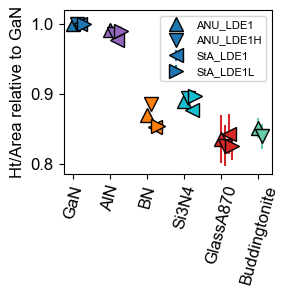

In [120]:
fig, ax = plt.subplots(figsize=(8*0.39,8*0.39))

clrs = {'GaN':'tab:blue', 'BN':'tab:orange', 'Buddingtonite':'mediumaquamarine',
        'AlN': 'tab:purple', 'GlassA870': 'tab:red', 'Si3N4':'tab:cyan'}
symbols = {'SXES': '*', 'ANU_LDE1': '^', 'ANU_LDE1H': 'v', 'StA_LDE1': '<', 'StA_LDE1L': '>'}

for i, col in enumerate(combined_apf_table.columns):
    for j, sample in enumerate(combined_apf_table.index):
        
        if col == 'SXES':
            size = 20
        else:
            size = 10
        
        if j == 0:
            leg = col
        else:
            leg = '_nolegend'
        
        plt.errorbar(x=j + i*0.1,
                     y=combined_apf_table.loc[sample, col],
                     yerr=combined_stdev_table.loc[sample, col],
                     fmt=symbols[col], label=leg, color=clrs[sample],
                     markersize=size, markeredgecolor='k')

ax.set_xticks(np.arange(len(combined_apf_table)))
ax.set_xticklabels(labels=combined_apf_table.index, rotation=75)

plt.legend(fontsize=8)
plt.ylabel('Ht/Area relative to GaN')
plt.tight_layout()

# Get the actual data and fit to plot figures showing the peak shapes

Import data

In [121]:
data = {'StA': 
            {'LDE1': {}, 'LDE1L': {}}
        ,'ANU': 
            {'LDE1': {}, 'LDE1H': {}}
       }

for lab in data.keys():
    for xtl in data[lab].keys():
        files = sorted(glob.glob(f'../data/processed/peak_shapes/data_with_fits_{lab}/{xtl}/*.csv'))
        samplenames = [Path(f).stem for f in files]
        spectral_data = [pd.read_csv(f, index_col=0) for f in files]
        data[lab][xtl] = dict(zip(samplenames, spectral_data))
        
        for n in samplenames:
            area = np.trapz(data[lab][xtl][n]['fit'], x=data[lab][xtl][n]['L'])
            data[lab][xtl][n]['cps_per_nA_corrected_scaled'] = data[lab][xtl][n]['cps_per_nA_corrected'] / area
            data[lab][xtl][n]['fit_scaled'] = data[lab][xtl][n]['fit'] / area


c:\Users\Eleanor\miniconda3\envs\n_epma_analysis\lib\site-packages\pandas\plotting\_matplotlib\core.py:633: UserWarning: The label '_nolegend' of <matplotlib.lines.Line2D object at 0x000001E37EA2FFA0> starts with '_'. It is thus excluded from the legend.
  ax.legend(handles, labels, loc="best", title=title)
c:\Users\Eleanor\miniconda3\envs\n_epma_analysis\lib\site-packages\pandas\plotting\_matplotlib\core.py:633: UserWarning: The label '_nolegend' of <matplotlib.lines.Line2D object at 0x000001E37E9E6A90> starts with '_'. It is thus excluded from the legend.
  ax.legend(handles, labels, loc="best", title=title)
c:\Users\Eleanor\miniconda3\envs\n_epma_analysis\lib\site-packages\pandas\plotting\_matplotlib\core.py:633: UserWarning: The label '_nolegend' of <matplotlib.lines.Line2D object at 0x000001E37E9B9580> starts with '_'. It is thus excluded from the legend.
  ax.legend(handles, labels, loc="best", title=title)
c:\Users\Eleanor\miniconda3\envs\n_epma_analysis\lib\site-packages\pandas

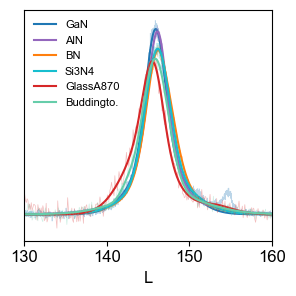

In [122]:
lab = 'ANU'
xtl = 'LDE1H'

fig, ax = plt.subplots(figsize=(8*0.39, 8*0.39))

for n in row_order:
    data[lab][xtl][n].plot(x='L', y='fit_scaled', color=clrs[n], linestyle='-', label=n.replace('nite',"."), ax=ax, lw=1.5)
    data[lab][xtl][n].plot(x='L', y='cps_per_nA_corrected_scaled', color=clrs[n], linestyle='-', label='_nolegend', ax=ax, alpha=0.3, lw=0.5)
    
plt.xlim(130, 160)
plt.yticks([])
# plt.ylim(-0.01, 0.3)
plt.legend(fontsize=8, frameon=False)
plt.tight_layout()


In [123]:
def plot_panel1(data, ax):

    lab = 'ANU'
    xtl = 'LDE1H'

    for n in row_order:
        data[lab][xtl][n].plot(x='L', y='fit_scaled', color=clrs[n], linestyle='-', ax=ax, lw=1.5, legend=False)
        data[lab][xtl][n].plot(x='L', y='cps_per_nA_corrected_scaled', color=clrs[n], linestyle='-', ax=ax, alpha=0.3, lw=0.5, legend=False)

    ax.set_xlim(137, 154)
    ax.set_ylabel('normalised cps/nA')
    ax.set_xlabel('Spectrometer position, L (mm)')
    ax.set_yticks([])
    ax.set_ylim(-0.01, 0.25)
    # ax.legend(fontsize=8, frameon=False)
    
    return None

def plot_panel2(combined_apf_table, combined_stdev_table, ax):

    clrs = {'GaN':'tab:blue', 'BN':'tab:orange', 'Buddingtonite':'mediumaquamarine',
            'AlN': 'tab:purple', 'GlassA870': 'tab:red', 'Si3N4':'tab:cyan'}
    symbols = {'ANU_LDE1': 'o', 'ANU_LDE1H': 's', 'StA_LDE1': 'P', 'StA_LDE1L': 'X'}

    for i, col in enumerate(combined_apf_table.columns):
        for j, sample in enumerate(combined_apf_table.index):
            
            size = 10

            plt.errorbar(x=j + i*0.1,
                         y=combined_apf_table.loc[sample, col],
                         yerr=combined_stdev_table.loc[sample, col],
                         fmt=symbols[col], color=clrs[sample],
                         markersize=size, markeredgecolor='k')

    ax.set_xticks(np.arange(len(combined_apf_table)))
    ax.set_xticklabels(labels=combined_apf_table.index, rotation=75)
    
    for i, k in enumerate(symbols.keys()):
        ax.plot(5, 0.915 + 0.02*i, symbols[k], markersize = 10, markeredgecolor='grey', markerfacecolor='w')
        ax.text(4.7, 0.915 + 0.02*i, k.replace('_', ' '), va='center', ha='right', fontsize=8)
    
    # ax.legend(fontsize=8)
    ax.set_ylabel('Area-peak factor')

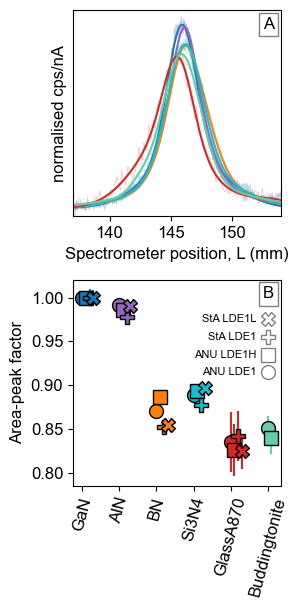

In [124]:
fig = plt.figure(figsize=(8*0.39, 16*0.39))
mosaic = """
    A
    B
    """
ax_dict = fig.subplot_mosaic(mosaic)

plot_panel1(data, ax_dict['A'])
plot_panel2(combined_apf_table, combined_stdev_table, ax_dict['B'])

for label, ax in ax_dict.items():
    trans = mtransforms.ScaledTranslation(-5/72, -5/72, fig.dpi_scale_trans)
    ax.text(1.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize=12, ha='right', va='top', fontfamily='Arial',
            bbox=dict(facecolor='w', edgecolor='grey', pad=3.0))

plt.tight_layout()
plt.savefig("../figures/peak_shape_and_apf_combined.png")

In [125]:
combined_apf_table.round(3)

,ANU_LDE1,ANU_LDE1H,StA_LDE1,StA_LDE1L
Sample,,,,
GaN,1.000,1.000,1.000,1.000
AlN,0.991,0.986,0.978,0.991
BN,0.870,0.886,0.852,0.854
Si3N4,0.889,0.894,0.877,0.897
GlassA870,0.835,0.826,0.842,0.825
Buddingtonite,0.851,0.840,NaN,NaN


In [126]:
combined_stdev_table.round(3)

,ANU_LDE1,ANU_LDE1H,StA_LDE1,StA_LDE1L
Sample,,,,
GaN,0.006,0.004,0.010,0.008
AlN,0.003,0.003,0.006,0.004
BN,0.002,0.002,0.004,0.003
Si3N4,0.003,0.003,0.004,0.003
GlassA870,0.034,0.030,0.029,0.020
Buddingtonite,0.014,0.018,NaN,NaN


In [127]:
def format_table_entry(apf, apf_sd):
    apf_sd_last_digit = str(round(apf_sd, 2)).replace('.','').lstrip('0')
    # if it's zero at this rounding, make it 1
    if apf_sd_last_digit == "":
        apf_sd_last_digit = "1"
    string_out = '{:.2f}({})'.format(apf, apf_sd_last_digit)
    
    if string_out == 'nan(nan)':
        string_out = '-'
    return string_out

In [128]:
formatted_apf_table = pd.DataFrame().reindex_like(combined_apf_table)

for col in formatted_apf_table.columns:
    for row in formatted_apf_table.index:
        formatted_apf_table.loc[row, col] = format_table_entry(combined_apf_table.loc[row, col],
                                                               combined_stdev_table.loc[row, col])

formatted_apf_table.columns = [col.replace('_', ' ') for col in formatted_apf_table.columns]
formatted_apf_table.to_csv("formatted_apf_table.csv")
formatted_apf_table

,ANU LDE1,ANU LDE1H,StA LDE1,StA LDE1L
Sample,,,,
GaN,1.00(1),1.00(1),1.00(1),1.00(1)
AlN,0.99(1),0.99(1),0.98(1),0.99(1)
BN,0.87(1),0.89(1),0.85(1),0.85(1)
Si3N4,0.89(1),0.89(1),0.88(1),0.90(1)
GlassA870,0.83(3),0.83(3),0.84(3),0.82(2)
Buddingtonite,0.85(1),0.84(2),-,-
